In [2]:
%matplotlib inline

In [3]:
import os
import sys 

import numpy as np 
import pandas as pd
import yellowbrick as yb 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

mpl.rcParams["figure.figsize"] = (16,8)

/Users/yutaro_ikeda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


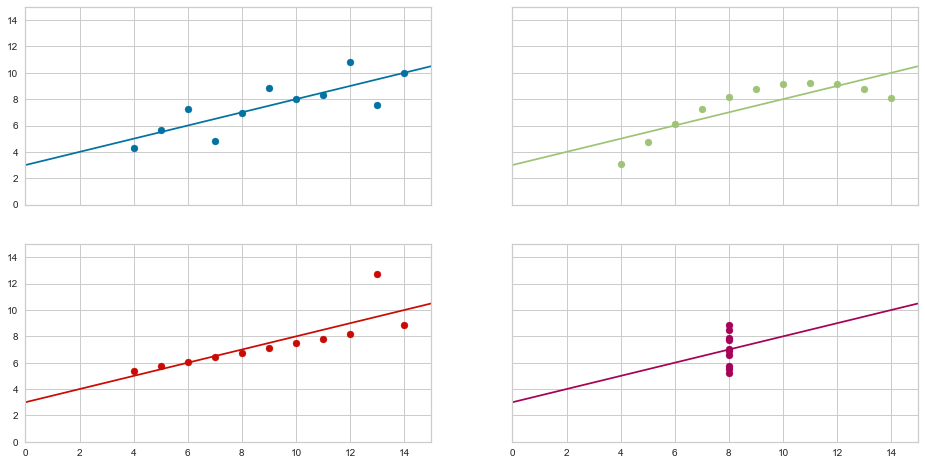

In [4]:
g = yb.anscombe()

In [5]:
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.features import ParallelCoordinates
from yellowbrick.features import PCADecomposition
from yellowbrick.features import Rank1D, Rank2D 
from yellowbrick.features import RadViz

In [6]:
import pandas as pd

# Classification

In [7]:
features = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 
    'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 
    'slope', 'ca', 'thal'
]
target = "target"

In [8]:
df = pd.read_csv('./data/heart.csv')
X = df[features]
y = df[target]

/Users/yutaro_ikeda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


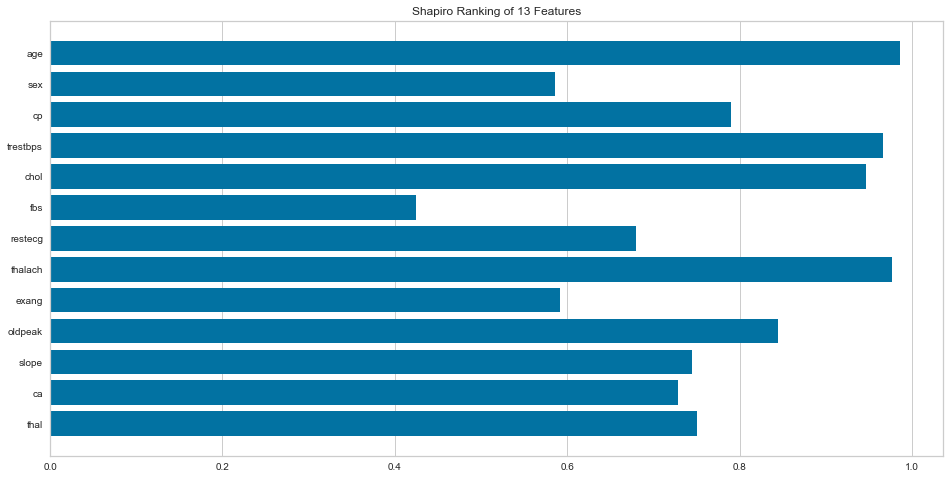

In [9]:
visualizer = Rank1D(features=features, algorithm='shapiro')

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

/Users/yutaro_ikeda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


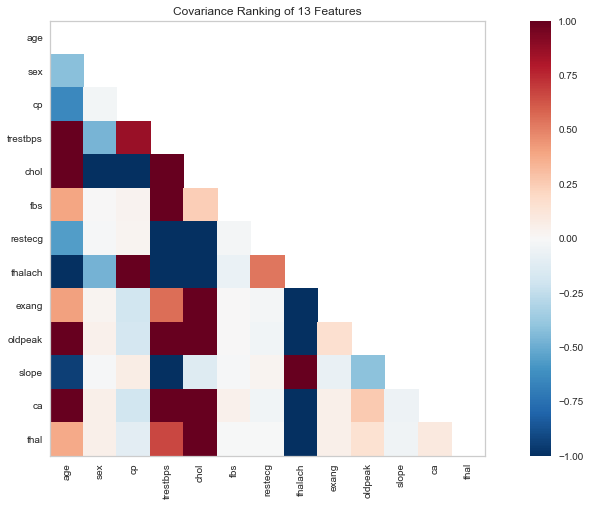

In [10]:
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

/Users/yutaro_ikeda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


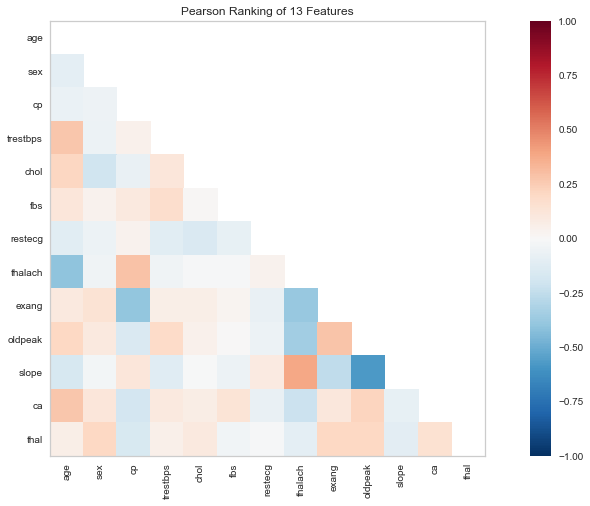

In [11]:
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

In [12]:
classes = y.unique()

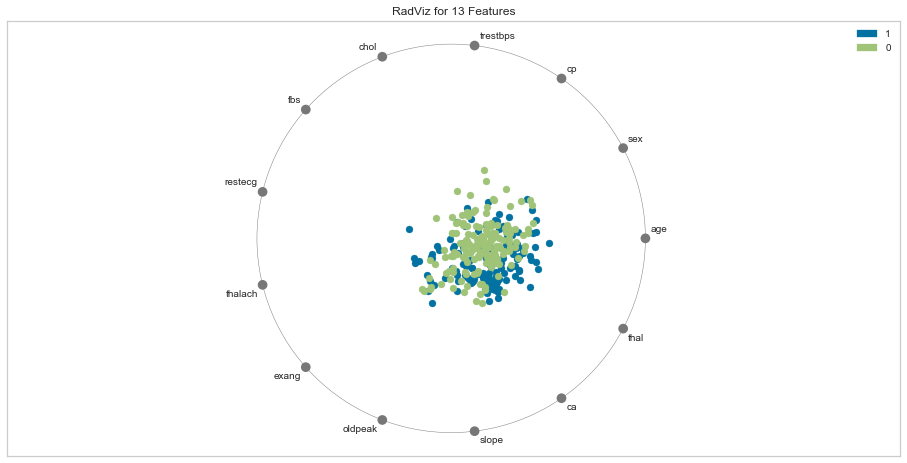

In [13]:
visualizer = RadViz(classes=classes, features=features)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

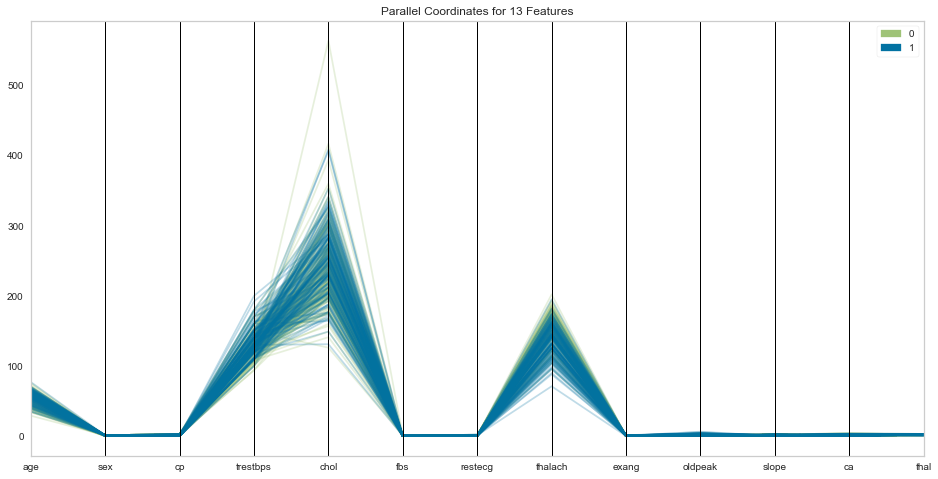

In [14]:
visualizer = ParallelCoordinates(classes=classes, features=features)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

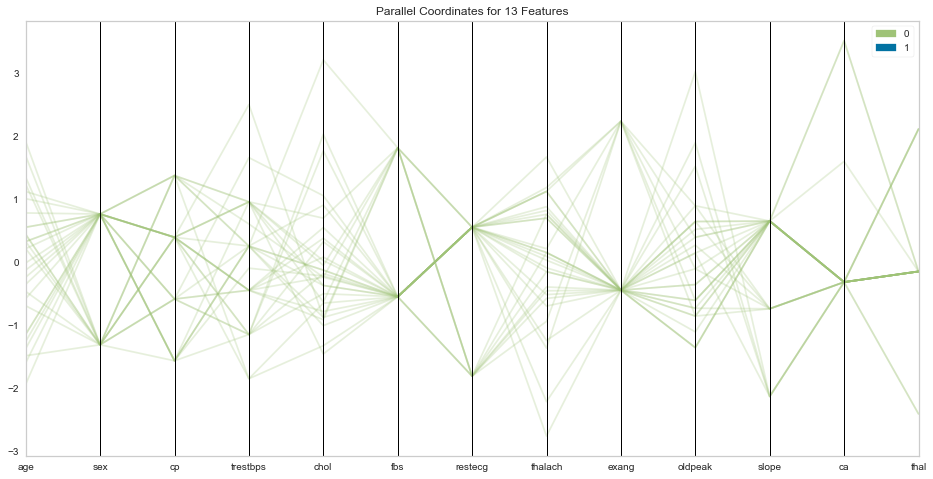

In [15]:
visualizer = visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', sample=0.1,
)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()    

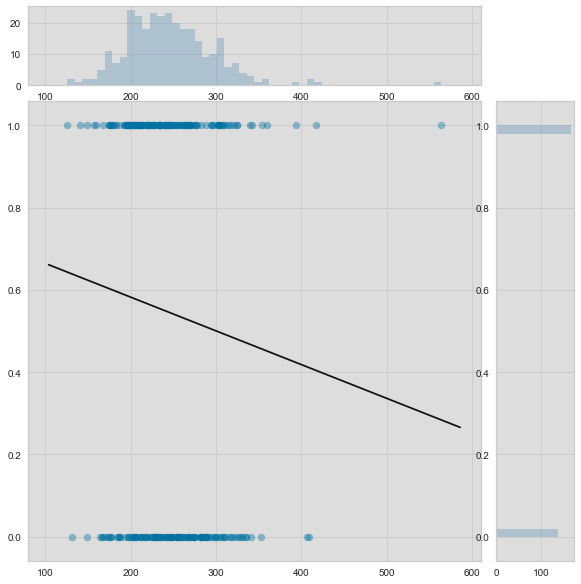

In [16]:
idx = 4
visualizer = JointPlotVisualizer(feature=features[idx], target=target)

visualizer.fit(X[features[idx]], y)
visualizer.poof()  

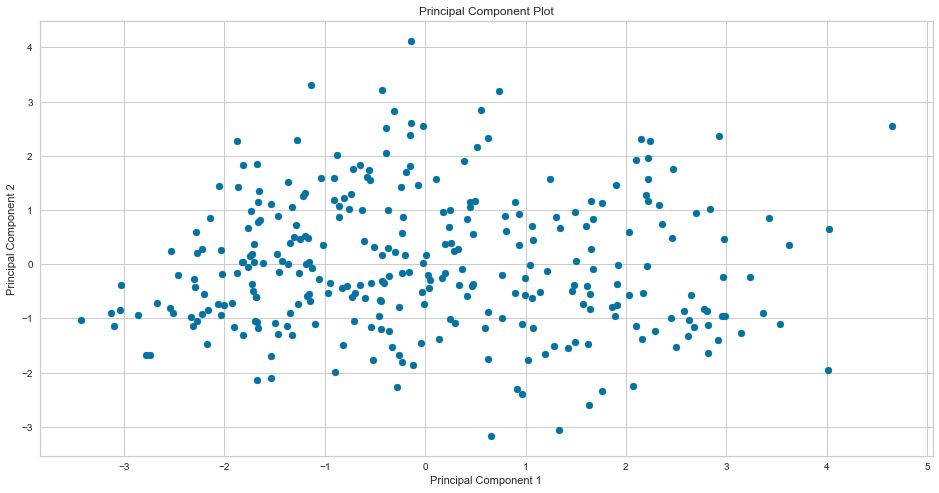

In [17]:
visualizer = PCADecomposition(scale=True, center=False, col=y)
visualizer.fit_transform(X,y)
visualizer.poof()

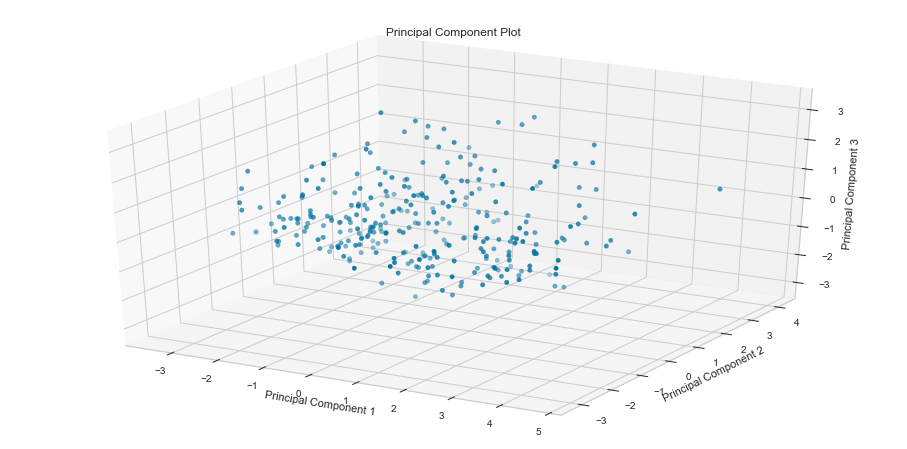

In [18]:
visualizer = PCADecomposition(scale=True, center=False, col=y, proj_dim=3)
visualizer.fit_transform(X,y)
visualizer.poof()

In [19]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot

In [20]:
# # Use Yellowbrick to load the concrete dataset
# data = load_concrete()

# # Save the data in a Pandas DataFrame
# df = pd.DataFrame(data['data'], columns=data['feature_names'])

# # Save feature names as a list and target variable as a string
# feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
# target_name = 'strength'

# # Get the X and y data from the DataFrame 
# X = df[feature_names]
# y = df[target_name]

# # Create the train and test data 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance,  ConfusionMatrix

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

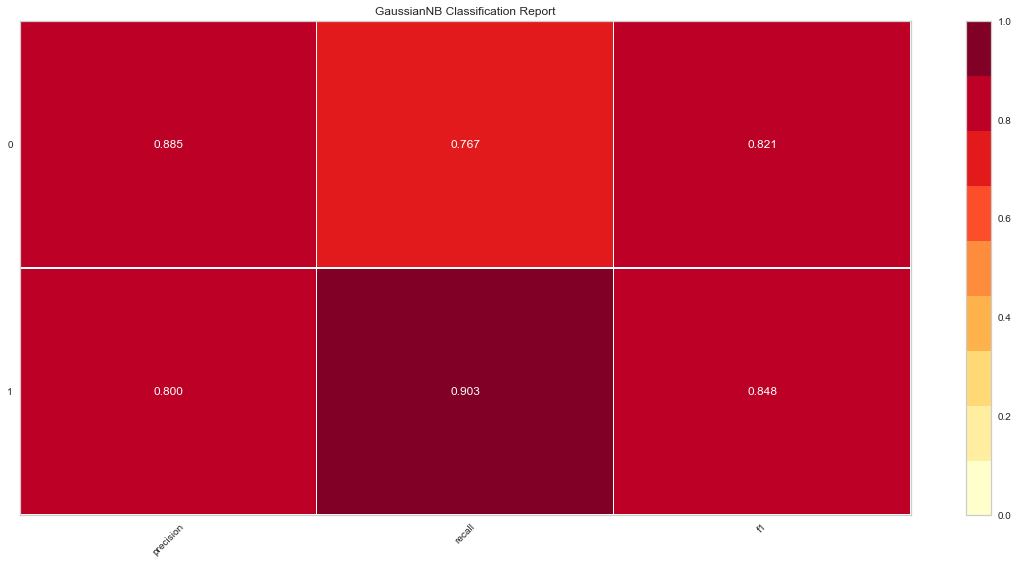

In [24]:
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

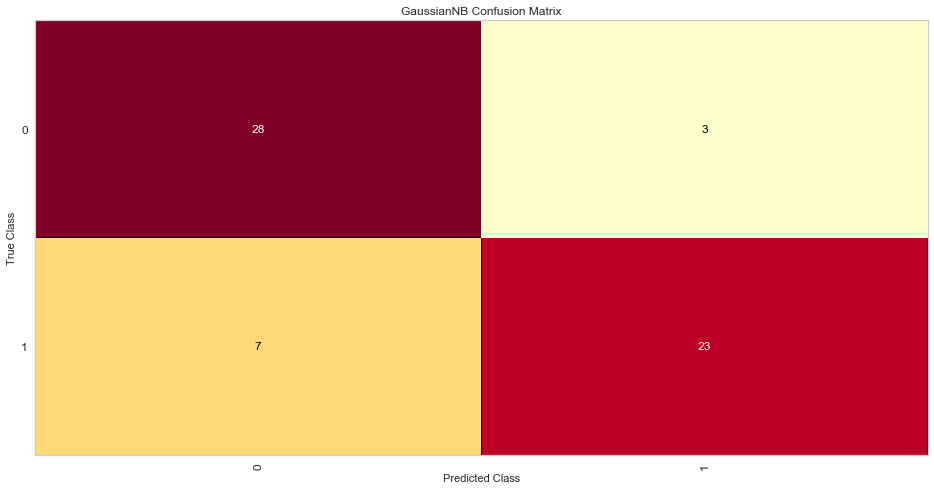

In [25]:
bayes = GaussianNB()
visualizer = ConfusionMatrix(bayes)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

In [50]:
# forest = RandomForestClassifier()
# visualizer = ClassBalance(forest, classes=classes)

# visualizer.fit(X_train, y_train)
# visualizer.score(X_test, y_test)
# g = visualizer.poof() 

# Regression

In [72]:
features = [
    "season", "month", "hour", "holiday", "weekday", "workingday",
    "weather", "temp", "feelslike", "humidity", "windspeed"
]

In [73]:
df = pd.read_csv('./data/bikeshare.csv')
X = df[features]
y = df["riders"]

In [17]:
df.head()

,rowid,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,feelslike,humidity,windspeed,casual,registered,riders
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


/Users/yutaro_ikeda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
/Users/yutaro_ikeda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/scipy/stats/morestats.py:1310: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


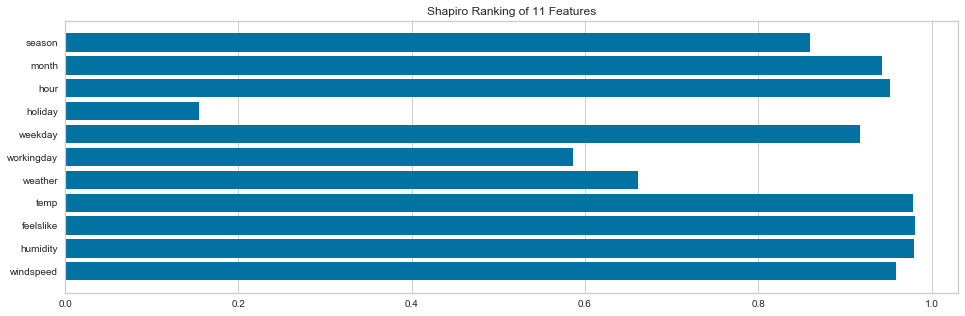

In [15]:
visualizer = Rank1D(features=features, algorithm='shapiro')

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

/Users/yutaro_ikeda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


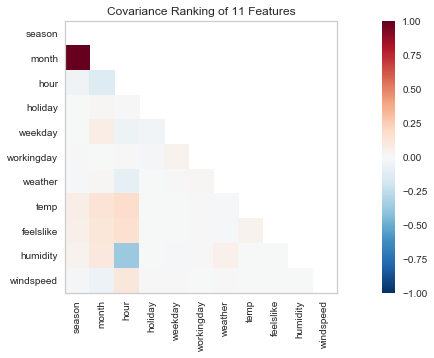

In [18]:
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

/Users/yutaro_ikeda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


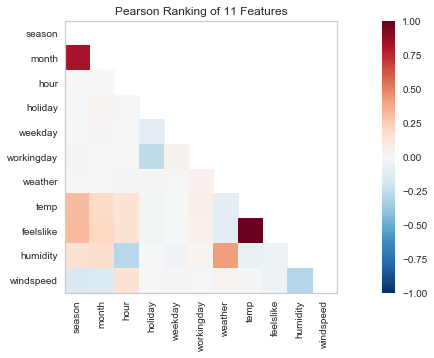

In [19]:
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

In [43]:
# visualizer = RadViz(features=features)

# visualizer.fit(X, y)
# visualizer.transform(X)
# visualizer.poof()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

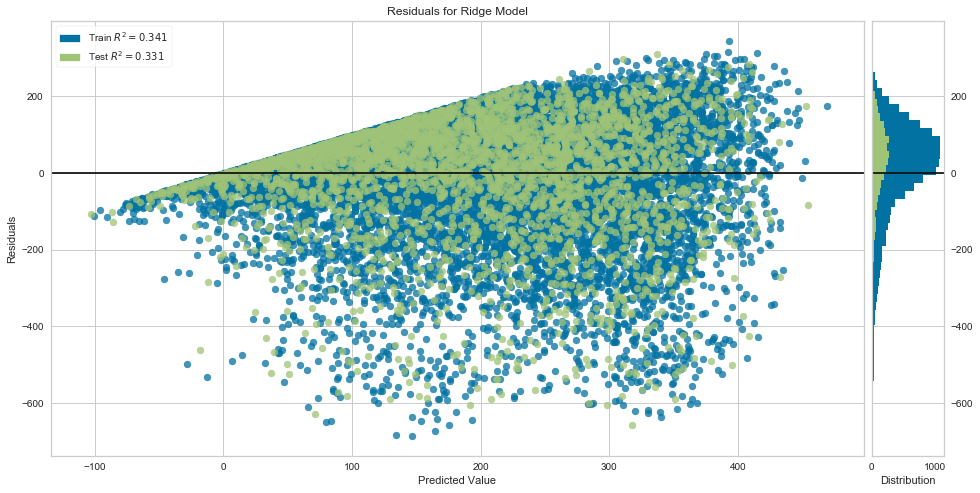

In [75]:
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

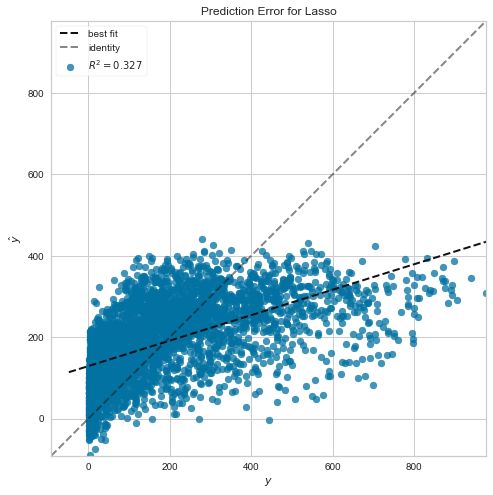

In [76]:
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

/Users/yutaro_ikeda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


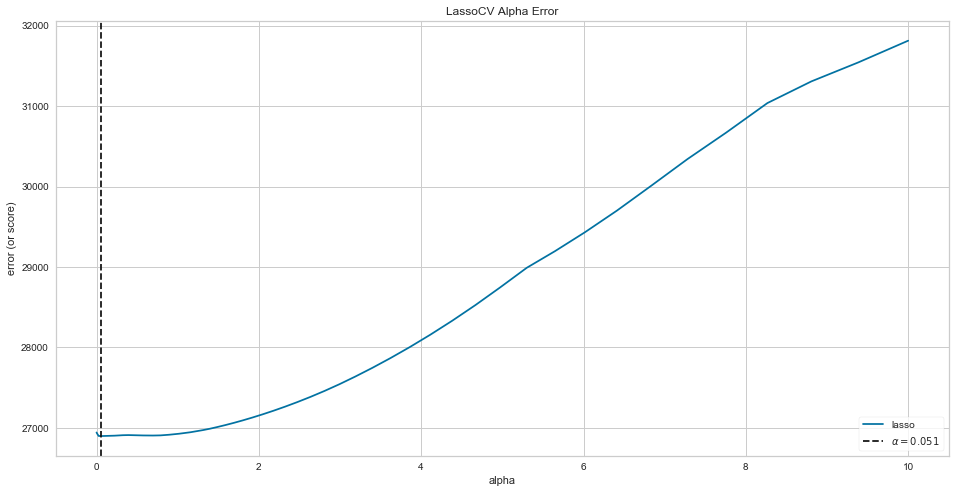

In [77]:
alphas = np.logspace(-10, 1, 400)

model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X, y)
g = visualizer.poof()